<a href="https://colab.research.google.com/github/therokitoki/AA2_TP_Alsop-Hachen-Nemeth/blob/main/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico AAII

Alumnos: Agustin Alsop, Rocio Hachen, Ulises Nemeth

## Ejercicio 1

### Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

### Dataset:
El dataset proporcionado incluye las siguientes variables para cada estudiante:
Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

### Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.

In [1]:
import os

REPO_NAME = "AA2_TP_Alsop-Hachen-Nemeth"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/therokitoki/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'AA2_TP_Alsop-Hachen-Nemeth'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 115 (delta 46), reused 43 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 74.50 MiB | 7.81 MiB/s, done.
Resolving deltas: 100% (46/46), done.


# Preparación del entorno

In [ ]:
!pip install pandas
!pip install scikit-learn

# Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Carga de datos

In [ ]:
dataset_1 = '/content/AA2_TP_Alsop-Hachen-Nemeth/datasets/Student_Performance.csv'
student_df = pd.read_csv(dataset_1)
student_df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Observamos que las variables cuantitativas están correctamente configuradas como **numéricas**.

# División de datos

In [ ]:
X = student_df.drop('Performance Index', axis=1)
y = student_df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Cantidad de datos luego de la separación')
print(f'Train: {X_train.shape[0]} - 80%\n Test: {X_test.shape[0]} - 20%')

Cantidad de datos luego de la separación
Train: 8000 - 80%
 Test: 2000 - 20%


# EDA

- Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
- Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
- Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
- Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
- Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

In [ ]:
print('Variables cuantitativas: ')
print(X_train.describe())
print('\nVariables cualitativas: ')
print(X_train['Extracurricular Activities'].describe())

Variables cuantitativas: 
       Hours Studied  Previous Scores  Sleep Hours  \
count    8000.000000      8000.000000  8000.000000   
mean        4.983250        69.531000     6.541625   
std         2.594862        17.343735     1.698493   
min         1.000000        40.000000     4.000000   
25%         3.000000        54.750000     5.000000   
50%         5.000000        70.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max         9.000000        99.000000     9.000000   

       Sample Question Papers Practiced  
count                       8000.000000  
mean                           4.616500  
std                            2.861241  
min                            0.000000  
25%                            2.000000  
50%                            5.000000  
75%                            7.000000  
max                            9.000000  

Variables cualitativas: 
count     8000
unique       2
top         No
freq      4043
Name: Extracurricular A

### Valores NaN

In [ ]:
na_values = X_train.isnull().sum()
print(f'Valores Nan:\n{na_values}')
if na_values.sum() == 0:
    print('\nNo se encontraron valores Nan')

print('\nFilas duplicadas:',X_train.duplicated().sum())

Valores Nan:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64

No se encontraron valores Nan

Filas duplicadas: 503


### Matriz de correlación

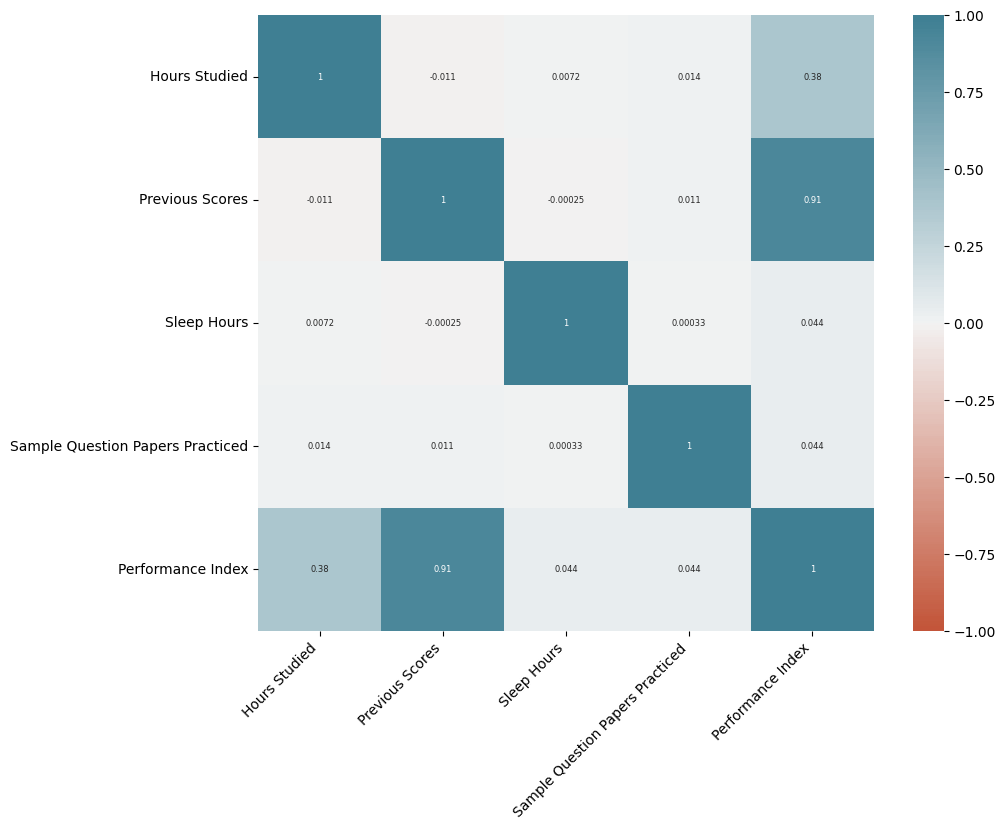

In [ ]:
df_columns = pd.concat([X_train, y_train], axis=1)

df_columns_corr =pd.DataFrame(df_columns,columns=df_columns.drop(columns=['Extracurricular Activities']).columns)

plt.figure(figsize=(10,8))
corr = df_columns_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Dejamos la variable target en la matriz de correlación, podemos ver que las variables Hours Studied y Previous Scores son las que más van a influenciar a la predicción. Sin embargo, vamos a dejar las otras variables también porque podrían aportar valor al modelo al capturar relaciones no lineales o interacciones que no se ven en la correlación lineal.

### Hours Studied ###
count    8000.000000
mean        4.983250
std         2.594862
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Hours Studied, dtype: float64 



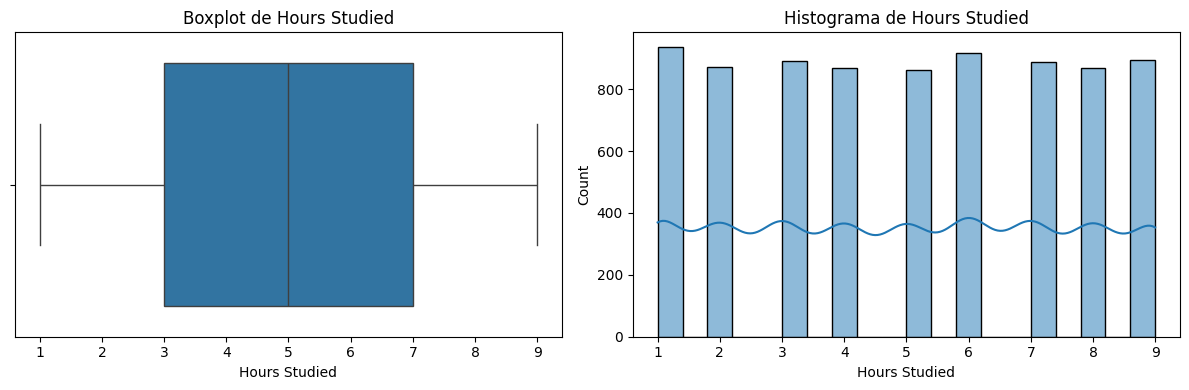







### Previous Scores ###
count    8000.000000
mean       69.531000
std        17.343735
min        40.000000
25%        54.750000
50%        70.000000
75%        85.000000
max        99.000000
Name: Previous Scores, dtype: float64 



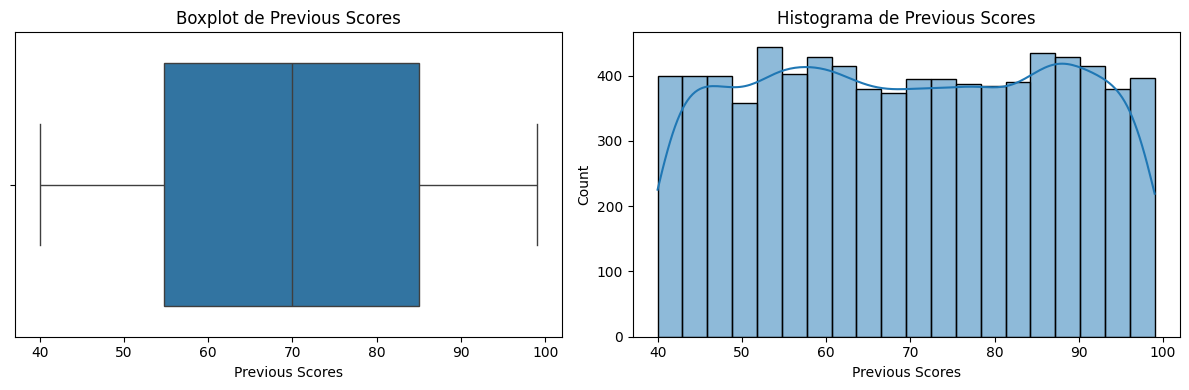







### Extracurricular Activities ###
count     8000
unique       2
top         No
freq      4043
Name: Extracurricular Activities, dtype: object 



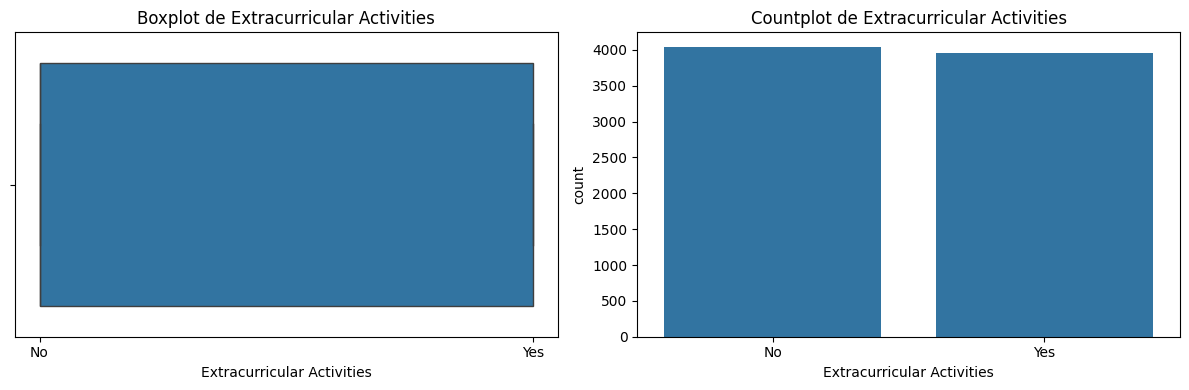







### Sleep Hours ###
count    8000.000000
mean        6.541625
std         1.698493
min         4.000000
25%         5.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: Sleep Hours, dtype: float64 



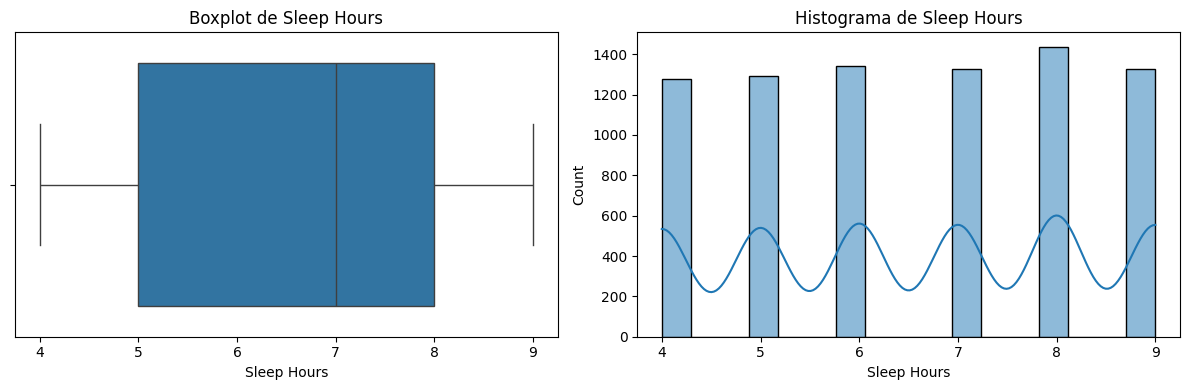







### Sample Question Papers Practiced ###
count    8000.000000
mean        4.616500
std         2.861241
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Sample Question Papers Practiced, dtype: float64 



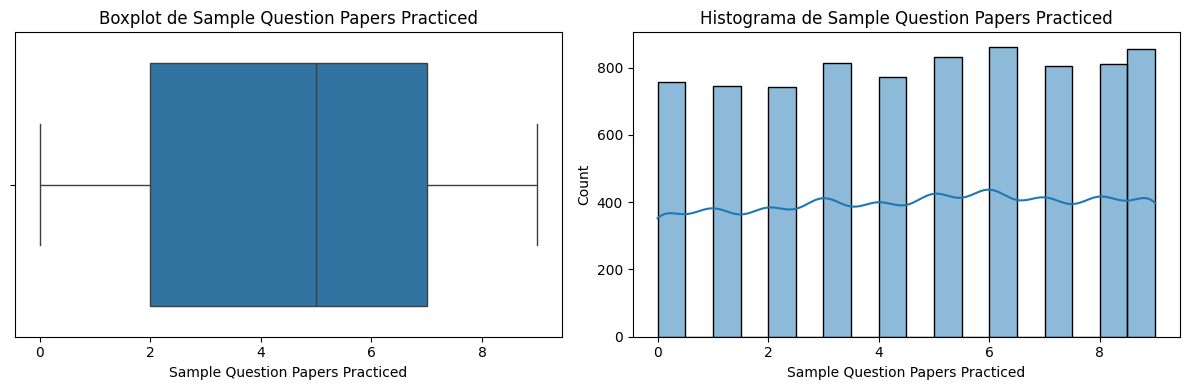







### Performance Index ###
count    8000.000000
mean       55.311500
std        19.202059
min        10.000000
25%        40.000000
50%        55.000000
75%        71.000000
max       100.000000
Name: Performance Index, dtype: float64 



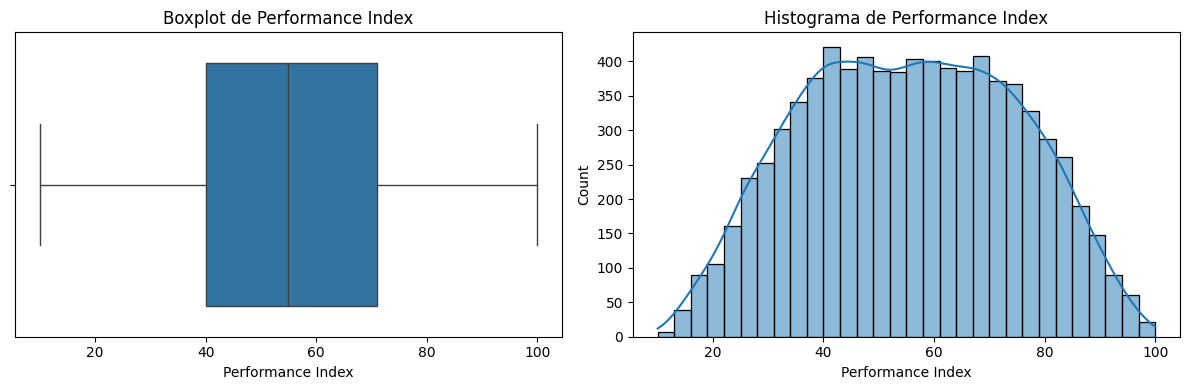

In [ ]:
x_train_grafico=pd.DataFrame(df_columns,columns=df_columns.columns)

for columna in x_train_grafico:
    print(f'### {columna} ###')
    print(df_columns[columna].describe(), '\n')

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(data=df_columns, x=columna, ax=axs[0])
    axs[0].set_title(f'Boxplot de {columna}')

    if columna != 'Extracurricular Activities':
        sns.histplot(data=df_columns, x=columna, kde=True, ax=axs[1])
        axs[1].set_title(f'Histograma de {columna}')
    else:
        sns.countplot(data=df_columns, x=columna, ax=axs[1])
        axs[1].set_title(f'Countplot de {columna}')

    plt.tight_layout()
    plt.show()

    print('\n\n\n\n\n')



Codificación de variables

In [ ]:
X_train['Extracurricular Activities'] = X_train['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X_test['Extracurricular Activities'] = X_test['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Definición del modelo

In [ ]:
histories = []


model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])


model.summary()

model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['R2Score','RootMeanSquaredError'])

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)
histories.append(history)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - R2Score: -3.7180 - RootMeanSquaredError: 41.2354 - loss: 1742.8435 - val_R2Score: 0.7993 - val_RootMeanSquaredError: 8.6130 - val_loss: 74.1839
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - R2Score: 0.8040 - RootMeanSquaredError: 8.6083 - loss: 74.1348 - val_R2Score: 0.8100 - val_RootMeanSquaredError: 8.3798 - val_loss: 70.2213
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - R2Score: 0.8164 - RootMeanSquaredError: 8.2840 - loss: 68.6607 - val_R2Score: 0.8491 - val_RootMeanSquaredError: 7.4670 - val_loss: 55.7563
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - R2Score: 0.8658 - RootMeanSquaredError: 7.0732 - loss: 50.0950 - val_R2Score: 0.8988 - val_RootMeanSquaredError: 6.1169 - val_loss: 37.4169
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - R2Score: 0.9047 - RootMeanSquaredError: 5.9267 - loss: 35.1481 - val_R2Score: 0.9164 - val_RootMeanSquaredError: 5.5600 - val_loss: 30.9141
Epoch 6/25
200/200 ━━━

# RMSE

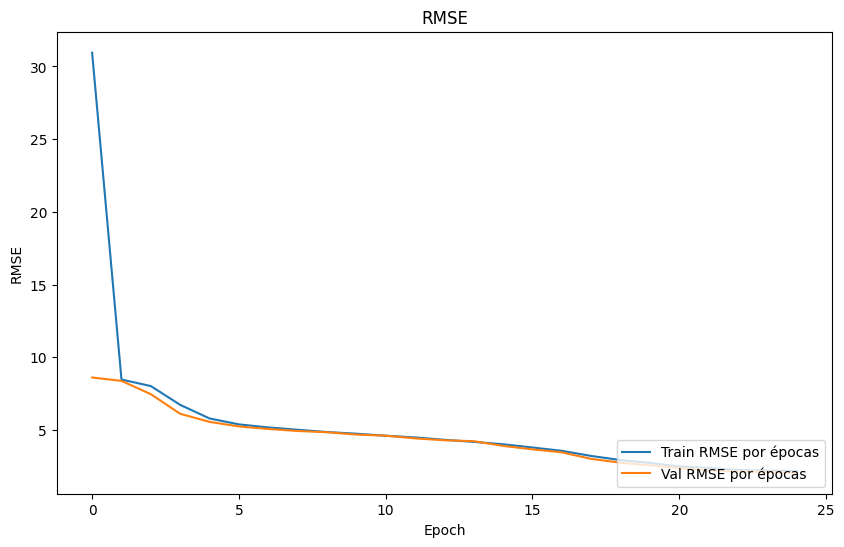

In [ ]:
plt.figure(figsize=(10, 6))

for history in histories:
    plt.plot(history.history['RootMeanSquaredError'], label=f'Train RMSE por épocas')
    plt.plot(history.history['val_RootMeanSquaredError'], label=f'Val RMSE por épocas')

plt.title('RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(loc='lower right')
plt.show()

# Loss

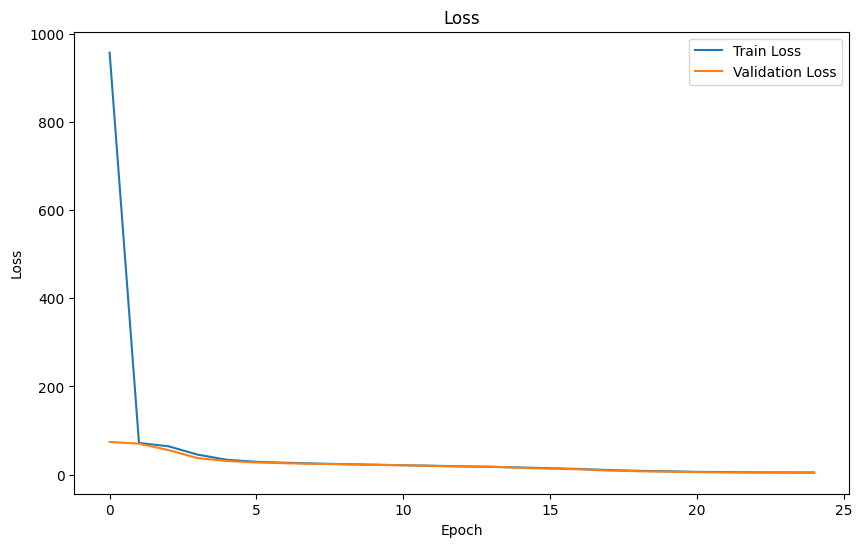

In [ ]:
plt.figure(figsize=(10, 6))

for history in histories:
    plt.plot(history.history['loss'], label=f'Train Loss')
    plt.plot(history.history['val_loss'], label=f'Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Cosas del rmse y loss y overfitting

## Resultados

In [ ]:
results = model.evaluate(X_test, y_test, verbose=1)
print(f"Test R2: {results[1]}")
print(f"Test RMSE: {results[2]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.9883 - RootMeanSquaredError: 2.1184 - loss: 4.4906
Test R2: 0.9882037043571472
Test RMSE: 2.090819835662842


R2:

Además, considerando que se deben predecir valores en un rango de entre 10 y 100 puntos de performance, obtener una raíz del error cuadrático medio (RMSE) de 2.09 indica un buen nivel de precisión en las predicciones.